<a href="https://colab.research.google.com/github/Jcasttrop/Neural-Networks-with-Python-and-Keras/blob/main/Clasificaci%C3%B3n_Binaria_para_IMDb_y_resolucion_de_problemas_de_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras import models, layers, optimizers

#IMPORTAMOS EL DATASET
from keras.datasets import imdb

**Sobre el dataset**

https://ai.stanford.edu/~amaas/data/sentiment/

https://keras.io/api/datasets/imdb/

In [2]:
#CARGAMOS NUESTROS DATOS

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(25000,) (25000,) (25000,) (25000,)


Tenemos 25000 reviews (ya convertidas a numeros), pero como tal, los numeros no nos dicen nada; Keras tiene una funcionalidad la cual nos trae los indices; que pondremos en un diccionario usando **dict comprehension**

In [4]:
word_index = imdb.get_word_index()

word_index = dict([(value, key) for (key, value) in word_index.items()])

word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [5]:
#Visualizamos entonces nuestro train data (que está convertido a numeros) usando 
#el indice creado

for i in train_data[0]:
  print(word_index.get(i - 3)) #el i-3 es porque las 3 primeras palabras están reservadas

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

**Keras solo puede recibir tensores y floats**
y nosotros en nuestros datos tiene una lista y int

Por lo cual tenemos que hacer una **vectorizacion de nuestros datos**

In [6]:
def vectorizacion(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))

  #Nosotros creamos el vector de resultados, el cual está lleno de 0
  #de dimensiom (#de secuencias* dimension del dataset)


  #vamos a hacer un bucle que ponga un 1 si tiene ese dato

  for i, sequences in enumerate(sequences):

    results[i, sequences] = 1

  return results


In [7]:
#Ya vectorizados los datos, generamos el data set a usar

X_Train = vectorizacion(train_data)
X_Test = vectorizacion(test_data)

#### Observemos la vectorizacion

In [8]:
X_Train.shape

#Tenemos un arreglo con 25000 ejemplos y 10000 palabras; donde cada palabra 
#fila tiene asignado su correspondiente tokenizacion (0 si no existe la palabra, 1 si si)


print(test_data[0]) 
print("Vease la celda (5), aqui se muestra el significado de este vector")
print(f"vectorizacion", X_Test[0]) 

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
Vease la celda (5), aqui se muestra el significado de este vector
vectorizacion [0. 1. 1. ... 0. 0. 0.]


In [9]:
#Creamos la variable y y la convertimos a float

y_train = np.asarray(train_labels).astype("float32")

y_test = np.asanyarray(test_labels).astype("float32")

In [10]:
from keras.layers.core.activation import Activation
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,))) #tenemos 10K datos
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid")) #al ser binario usamos 1 layer y sigmoid

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [12]:
#creamos los datos de validación y de entrenamiento (partiendolos a la mitad)

x_val = X_Train[:10000]
partial_x_train = X_Train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


#Aunque podemos ahorrarrnos esto en el .fit, agregandole el parametro (validation_split=0.3)

In [13]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5351 - accuracy: 0.7821 - val_loss: 0.4239 - val_accuracy: 0.8526
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3283 - accuracy: 0.8953 - val_loss: 0.3175 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2374 - accuracy: 0.9245 - val_loss: 0.2823 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1868 - accuracy: 0.9397 - val_loss: 0.2728 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1493 - accuracy: 0.9534 - val_loss: 0.2762 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1226 - accuracy: 0.9625 - val_loss: 0.3005 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1015 - accuracy: 0.9699 - val_loss: 0.3188 - val_accuracy: 0.8789
Epoch 8/20
30

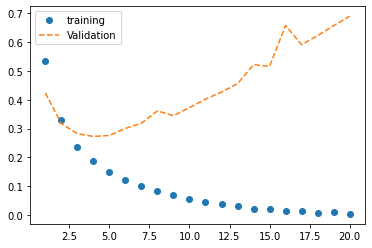

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history #esto muestra cada una de las epocas
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epoch=range(1, len(loss_values) + 1)

plt.plot(epoch, loss_values, "o", label="training")
plt.plot(epoch, val_loss_values, "--", label="Validation")
plt.legend()
plt.show()

Hay Overfitting!

In [15]:
model.evaluate(X_Test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7455 - accuracy: 0.8514


[0.7455069422721863, 0.851360023021698]

# **Para resolver el Overfitting, vamos a hacer un modelo menos complejo**

A manera educativa, vamos a hacer nuevamente, el codigo, pero en la aplicación deberiamos solo variar los parametros

**I- Con arquitectura más pequeña**

In [16]:
from keras.layers.core.activation import Activation
model2 = models.Sequential()
model2.add(layers.Dense(4, activation="relu", input_shape=(10000,))) #tenemos 10K datos
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid")) #al ser binario usamos 1 layer y sigmoid

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6341 - accuracy: 0.7506 - val_loss: 0.5565 - val_accuracy: 0.8207
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4954 - accuracy: 0.8625 - val_loss: 0.4663 - val_accuracy: 0.8575
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4055 - accuracy: 0.8936 - val_loss: 0.4012 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3377 - accuracy: 0.9086 - val_loss: 0.3550 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2866 - accuracy: 0.9197 - val_loss: 0.3231 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2480 - accuracy: 0.9299 - val_loss: 0.3012 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2178 - accuracy: 0.9381 - val_loss: 0.2862 - val_accuracy: 0.8905
Epoch 8/20
30

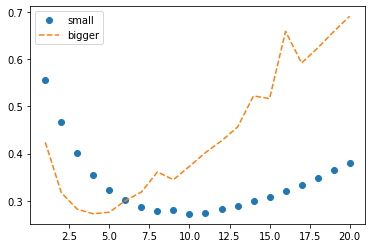

In [17]:
history_dict = history.history #esto muestra cada una de las epocas
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
val_loss_values_2 = history2.history["val_loss"]


epoch=range(1, len(loss_values) + 1)



plt.plot(epoch, val_loss_values_2, "o", label="small")
plt.plot(epoch, val_loss_values, "--", label="bigger")
plt.legend()
plt.show()

#Aqui vemos que con arquitectura más pequeña obtenemos mejores resultados

**II- Con regularizacion**

In [18]:
from keras import regularizers

#Fijese que volvimos a subir el numero de neuronas

model3 = models.Sequential()
model3.add(layers.Dense(16, activation="relu", input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001))) 
model3.add(layers.Dense(16, activation="relu",            #este es el lambda
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation="sigmoid")) 

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history3 = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.7337 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.8166 - val_accuracy: 0.8612
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.8010 - val_accuracy: 0.8620
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8375 - val_accuracy: 0.8609
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.8821 - val_accuracy: 0.8613
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 6.3787e-04 - accuracy: 1.0000 - val_loss: 0.9091 - val_accuracy: 0.8616
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 4.9806e-04 - accuracy: 1.0000 - val_loss: 0.9763 - val_accuracy: 0.8573
Epoch

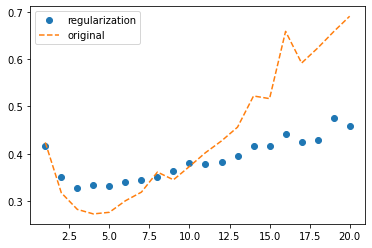

In [25]:
history_dict = history.history 

val_loss_values = history_dict["val_loss"]
val_loss_values_3 = history3.history["val_loss"]


epoch=range(1, len(loss_values) + 1)


plt.plot(epoch, val_loss_values_3, "o", label="regularization")
plt.plot(epoch, val_loss_values, "--", label="original")
plt.legend()
plt.show()

Con la misma arquitectura (16-16-1), con regularizacion no escala tanto el overfitting

III- **Dropout**

In [26]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation="relu", input_shape=(10000,))) 
model4.add(layers.Dropout(0.5)) #Hay que poner el dropout en la capa en que se quiere
model4.add(layers.Dense(16, activation="relu"))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation="sigmoid")) 

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6366 - accuracy: 0.6353 - val_loss: 0.5485 - val_accuracy: 0.7880
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5267 - accuracy: 0.7641 - val_loss: 0.4433 - val_accuracy: 0.8667
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4382 - accuracy: 0.8305 - val_loss: 0.3617 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3689 - accuracy: 0.8641 - val_loss: 0.3081 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3251 - accuracy: 0.8875 - val_loss: 0.2883 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2824 - accuracy: 0.9054 - val_loss: 0.2885 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2511 - accuracy: 0.9167 - val_loss: 0.2708 - val_accuracy: 0.8919
Epoch 8/20
30

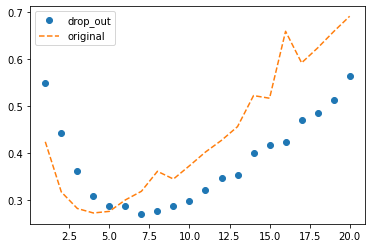

In [28]:
history_dict = history.history 

loss_values = history_dict["loss"]

val_loss_values = history_dict["val_loss"]
val_loss_values_4 = history4.history["val_loss"]


epoch=range(1, len(loss_values) + 1)


plt.plot(epoch, val_loss_values_4, "o", label="drop_out")
plt.plot(epoch, val_loss_values, "--", label="original")
plt.legend()
plt.show()